In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid", palette='Dark2')

In [2]:
train_df = pd.read_table("dataset/train.tsv")
test_df = pd.read_table("dataset/test.tsv")

In [3]:
train_df.head()

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1


<AxesSubplot:xlabel='is_fake', ylabel='is_fake'>

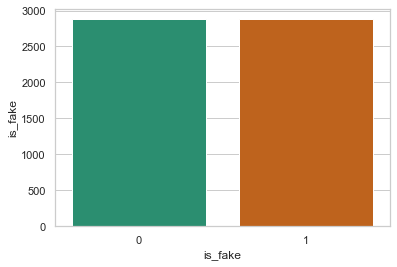

In [4]:
sns.barplot(data=train_df, y = train_df['is_fake'].value_counts(), x = train_df['is_fake'])

In [6]:
import WordCloud

ModuleNotFoundError: No module named 'WordCloud'

## Baseline

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [73]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])

In [74]:
X_train, X_val, y_train, y_val = train_test_split(train_df['title'], train_df['is_fake'], test_size=0.33)

In [75]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_val: ',X_val.shape)
print('y_val: ',y_val.shape)

X_train:  (3857,)
y_train:  (3857,)
X_val:  (1901,)
y_val:  (1901,)


In [76]:
text_clf = text_clf.fit(X_train, y_train)

In [77]:
predicted = text_clf.predict(X_val)

In [78]:
print(metrics.classification_report(y_val, predicted))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       965
           1       0.77      0.90      0.83       936

    accuracy                           0.82      1901
   macro avg       0.83      0.82      0.82      1901
weighted avg       0.83      0.82      0.82      1901



In [79]:
metrics.f1_score(y_val, predicted)

0.8300395256916997